# 1.Documentation

This notebook contains filter implementations like instagram filters , the filters I have tried to implement are : 
<br>1.'Clarendon'
<br>2.'Moon'
<br>3.'Slumber'
<br>4.'Perpetua'
<br>5.'Lo-Fi'
<br>
**The used approach for implementing these filters is :**
<br>
1. change the values of channels in RGB color tybe
<br>
2. change the values of channels in HSV color tybe
<br>
3. change the values of channels in LAB color tybe
<br>
4. improving contrast with CLAHE(Contrast Limited Adaptive Histogram Equalization)


# 2.Script

## 2.1 packages

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 2.2 some useful functions
I have implemented These functions to help me with filtering.

### 2.2.1 adjusting contrast with CLAHE

In [3]:
def improve_contrast(img):
    lab_image=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    ch_l,ch_a,ch_b=cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    ch_l = clahe.apply(ch_l)
    new_img=cv2.merge((ch_l,ch_a,ch_b))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_LAB2RGB)
    return show_img

### 2.2.1 increasing brightness

In [4]:
def increase_brightness(img,value):
    hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ch_h,ch_s,ch_v=cv2.split(hsv_image)
    limit = 255 - value
    ch_v[ch_v > limit] = 255
    ch_v[ch_v <= limit] += value
    new_img=cv2.merge((ch_h,ch_s,ch_v))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
    return show_img

### 2.2.2 decreasing brightness

In [5]:
def decrease_brightness(img,value):
    hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ch_h,ch_s,ch_v=cv2.split(hsv_image)
    limit = 0 + value
    ch_v[ch_v < limit] = 0
    ch_v[ch_v >= limit] -= value
    new_img=cv2.merge((ch_h,ch_s,ch_v))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
    return show_img

### 2.2.3 increasing white color

In [6]:
def increase_saturation(img,value):
    hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ch_h,ch_s,ch_v=cv2.split(hsv_image)
    limit = 255 - value
    ch_s[ch_s > limit] = 255
    ch_s[ch_s <= limit] += value
    new_img=cv2.merge((ch_h,ch_s,ch_v))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
    return show_img

### 2.2.4 increasing red color

In [7]:
def increase_red(img,value):
    ch_b,ch_g,ch_r=cv2.split(img)
    limit =255-value
    ch_r[ch_r>limit]=255 
    ch_r[ch_r<=limit]+=value
    new_img=cv2.merge((ch_b,ch_g,ch_r))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    return show_img

### 2.2.5 decrease  green color

In [8]:
def decrease_green(img,value):
    ch_b,ch_g,ch_r=cv2.split(img)
    limit=0+value
    ch_g[ch_g < limit]=0 
    ch_g[ch_g >= limit] -= value
    new_img=cv2.merge((ch_b,ch_g,ch_r))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    return show_img

### 2.2.6 increase A channel in LAB color
<br>
L : Lightness from black(0)to white(100) 
<br>
A : from green(-100) to red(100) 
<br>
B : from blue(-100) to yellow(100) 

In [9]:
def increase_a_LAB(img,value):
    lab_image=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    ch_l,ch_a,ch_b=cv2.split(lab_image)
    ch_a[:,:]+=value
    new_img=cv2.merge((ch_l,ch_a,ch_b))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_LAB2RGB)
    return show_img

## 2.3 the *insta_like* function

In [10]:

def insta_like(image,filter_name):
    '''
    Arguments:
    image : string contains the path of the input image .
    filter_name : string contains the name of the required filter,
    it should be one of these : '','','','',or'' .

    Returns:
    output image
    '''
    img=cv2.imread(image,1)
    
    if filter_name=='Clarendon':
        
        # increase shadows
        new_img=improve_contrast(img)
        # increase brightness
        new_img=cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        bright_img=increase_brightness(new_img,60)
        show_img=bright_img
        
    elif filter_name=='Moon':
        hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        ch_h,ch_s,ch_v=cv2.split(hsv_image)
        ch_s[:,:] =ch_s[:,:]* 0.1
        new_img=cv2.merge((ch_h,ch_s,ch_v))
        # you must go back to RGB to show image with pyplot
        show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
        
    elif filter_name=='Slumber':
        show_img=improve_contrast(img)
        
        
    elif filter_name=='Perpetua':
        hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        ch_h,ch_s,ch_v=cv2.split(hsv_image)
        ch_v[:,:] =ch_v[:,:]* 0.85
        new_img=cv2.merge((ch_h,ch_s,ch_v))
        # you must go back to RGB to show image with pyplot
        show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
        
    elif filter_name=='Lo-Fi':
        # increase shadows
        new_img=improve_contrast(img)
        # increase brightness
        new_img=cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        new_img=increase_brightness(new_img,40)
        new_img=cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        new_img=increase_saturation(new_img,20)
        show_img=new_img
    
    plt.imshow(show_img,interpolation='gaussian')    

# 2.0 Input image

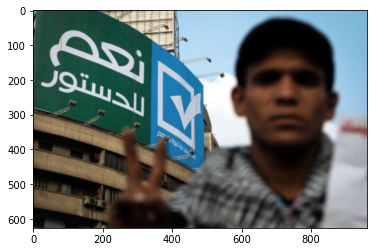

In [11]:
img=cv2.imread('test.jpg',1)
# you must go back to RGB to show image with pyplot
show_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img,interpolation='gaussian')

## 2.1 Clarendon filter
It intensifies shadows and brightens highlights in your photos.

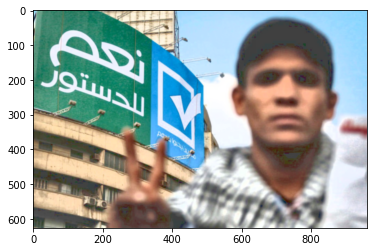

In [12]:
insta_like('test.jpg','Clarendon')

## 2.2 Moon filter
it as the black and white version of image, with slightly more intense shadows.

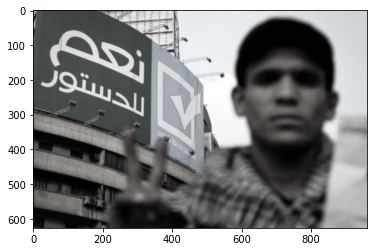

In [13]:
insta_like('test.jpg','Moon')

## 2.3 Slumber filter
his filter creates a yellow mask which desaturates most of the colors in your image.

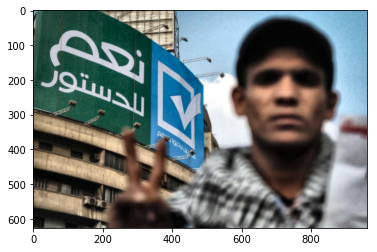

In [14]:
insta_like('test.jpg','Slumber')

## 2.4 Perpetua filter
Perpetua will brighten an image, and enhances its green and yellow tones.

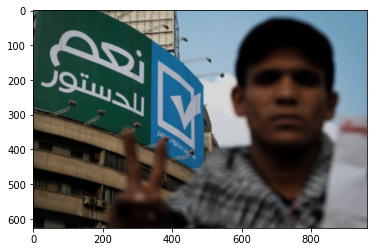

In [15]:
insta_like('test.jpg','Perpetua')

## 2.5 Lo-Fi filter
Lo-fi brightens colors by bumping up the saturation, while also adding shadows to your photo.

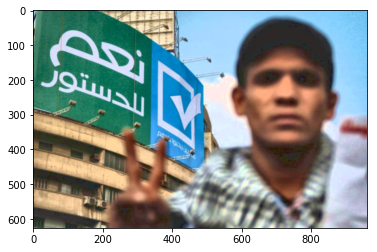

In [16]:
insta_like('test.jpg','Lo-Fi')